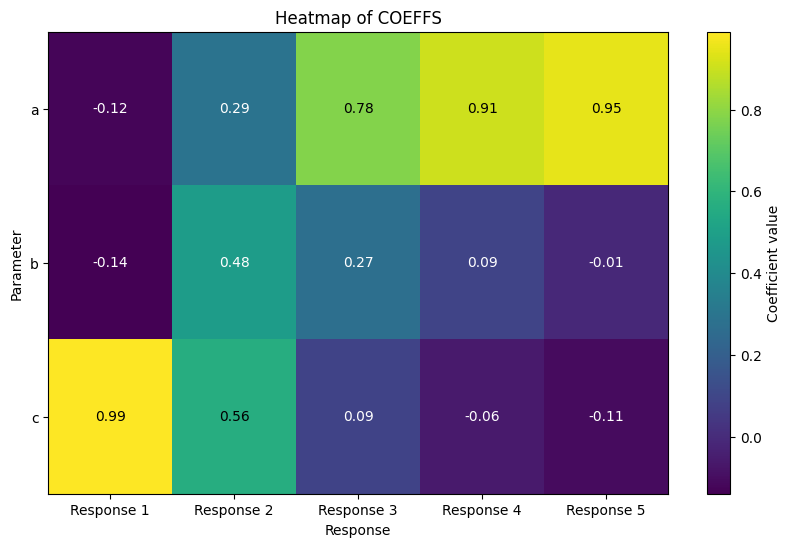

In [5]:
import matplotlib.pyplot as plt

from ert.config import ErtConfig
from ert.storage import open_storage

ert_config = ErtConfig.from_file("poly.ert")

with open_storage(ert_config.ens_path, mode="r") as storage:
    experiment = storage.get_experiment_by_name("ensemble-experiment")
    ensemble = experiment.get_ensemble_by_name("default_1")
    corr_XY = ensemble.load_cross_correlations()

coeffs = corr_XY.COEFFS.values
parameter_names = list(corr_XY.parameter.values)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(coeffs, cmap="viridis", aspect="auto")
plt.colorbar(heatmap, label="Coefficient value")
plt.title("Heatmap of COEFFS")
plt.xlabel("Response")
plt.ylabel("Parameter")
plt.xticks(
    range(coeffs.shape[1]), labels=[f"Response {i+1}" for i in range(coeffs.shape[1])]
)
plt.yticks(range(coeffs.shape[0]), labels=parameter_names)

# Annotating each cell with the coefficient values
for i in range(coeffs.shape[0]):
    for j in range(coeffs.shape[1]):
        text_color = (
            "white" if coeffs[i, j] < 0.5 else "black"
        )  # Adjusting text color for readability
        plt.text(
            j, i, f"{coeffs[i, j]:.2f}", ha="center", va="center", color=text_color
        )

plt.show()

In [2]:
corr_XY

<xarray.Dataset> Size: 144B
Dimensions:    (parameter: 3, response: 5)
Coordinates:
  * parameter  (parameter) object 24B 'a' 'b' 'c'
Dimensions without coordinates: response
Data variables:
    COEFFS     (parameter, response) float64 120B -0.1236 0.2924 ... -0.1065